In [1]:
import torch,os
from pathlib import Path
import numpy as np
import pandas as pd
import pprint as pp
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 140
import seaborn as sns
from collections import OrderedDict
import pickle,os,json,operator

import utils as utils
import data as data
from importlib import reload
reload(utils);
reload(data);

In [2]:
dataset_path='/scratch/ec2684/research/consistency-lm/training_data/wikitext2-sentencized.json'

lm_path = [
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_tied_seeds/0108_1930/wikitext2_sentencized_tied_seeds____seed=0/wikitextv2',
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_tied_seeds/0108_1930/wikitext2_sentencized_tied_seeds____seed=1/wikitextv2',
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_tied_seeds/0108_1930/wikitext2_sentencized_tied_seeds____seed=2/wikitextv2',
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_tied_seeds/0108_1930/wikitext2_sentencized_tied_seeds____seed=3/wikitextv2',
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_tied_seeds/0108_1930/wikitext2_sentencized_tied_seeds____seed=4/wikitextv2',
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_tied_seeds/0108_1930/wikitext2_sentencized_tied_seeds____seed=5/wikitextv2',
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_tied_seeds/0108_1930/wikitext2_sentencized_tied_seeds____seed=6/wikitextv2',
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_tied_seeds/0108_1930/wikitext2_sentencized_tied_seeds____seed=7/wikitextv2',
]

strlm_path = [
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_st_lstm/0108_1954/wikitext2_sentencized_st_lstm____st-epsilon=0.01/wikitextv2',
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_st_lstm/0108_1954/wikitext2_sentencized_st_lstm____st-epsilon=0.001/wikitextv2',
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_st_lstm/0108_1954/wikitext2_sentencized_st_lstm____st-epsilon=0.0001/wikitextv2',
]

osl_path = [
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_st_lstm/test_run/wikitextv2/_235',
]

focal = [
    '/scratch/ec2684/research/consistency-lm/runs/wikitext2_sentencized_st_lstm/test_run/wikitextv2/focal_gamma4_lr_0.005_lm',
]

In [3]:
def load_model(model_load_dir):
    if not os.path.exists(model_load_dir):
        raise EOFError("Invalid model load path %s" % model_load_dir)
        
    current_device = "cuda" if torch.cuda.device_count() > 0 else "cpu"
    
    model_dict = torch.load(os.path.join(model_load_dir, "model_best.pt"), map_location=torch.device(current_device))
    return model_dict

In [4]:
def svd(model_path):
    model = load_model(model_path)
    return torch.linalg.svd(model['model_dict']['projection.weight'], full_matrices=True)

In [5]:
lm0_svd=svd(lm_path[0])
lm1_svd=svd(lm_path[1])
lm2_svd=svd(lm_path[2])

# lm3_svd=svd(lm_path[3])
# lm4_svd=svd(lm_path[4])
# lm5_svd=svd(lm_path[5])
# lm6_svd=svd(lm_path[6])
# lm7_svd=svd(lm_path[7])

strlm01_svd=svd(strlm_path[0])
strlm001_svd=svd(strlm_path[1])
strlm0001_svd=svd(strlm_path[2])

In [21]:
def proj(svd,title):
    U,S,Vh = svd
    proj = U[:,:2]@torch.diag(S[:2])@Vh[:2, :2]
    plt.figure(figsize=(8,8))
    plt.scatter(proj[:-1,0], proj[:-1,1],alpha=0.5,label='non-eos')
    plt.scatter(proj[-1,0], proj[-1,1],alpha=1.0,label='<eos>')
    plt.legend(loc="upper right")
    plt.title(title)
    plt.xlabel(r'$\sigma_1$')
    plt.ylabel(r'$\sigma_2$')
    plt.axhline(y=0, color='r',linestyle='--')
    plt.axvline(x=0, color='r',linestyle='--')
    plt.show()

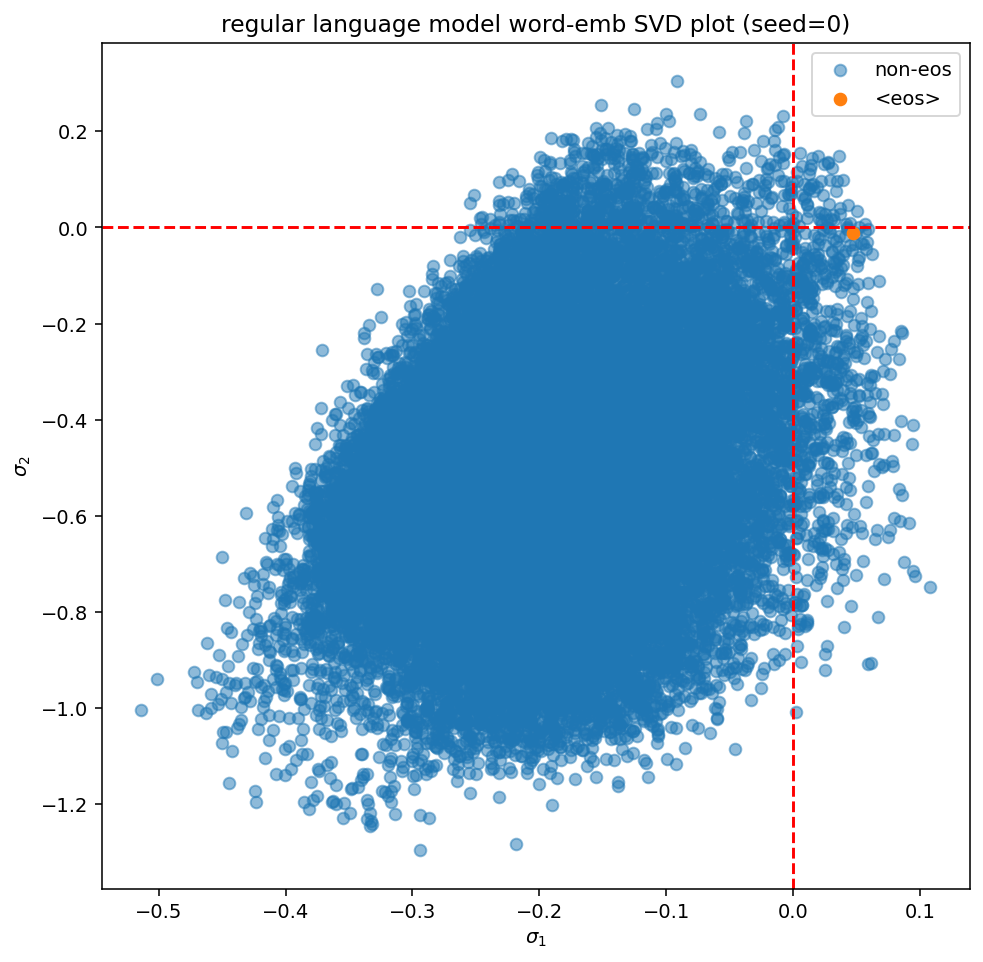

In [26]:
proj(lm0_svd,'regular language model word-emb SVD plot (seed=0)')

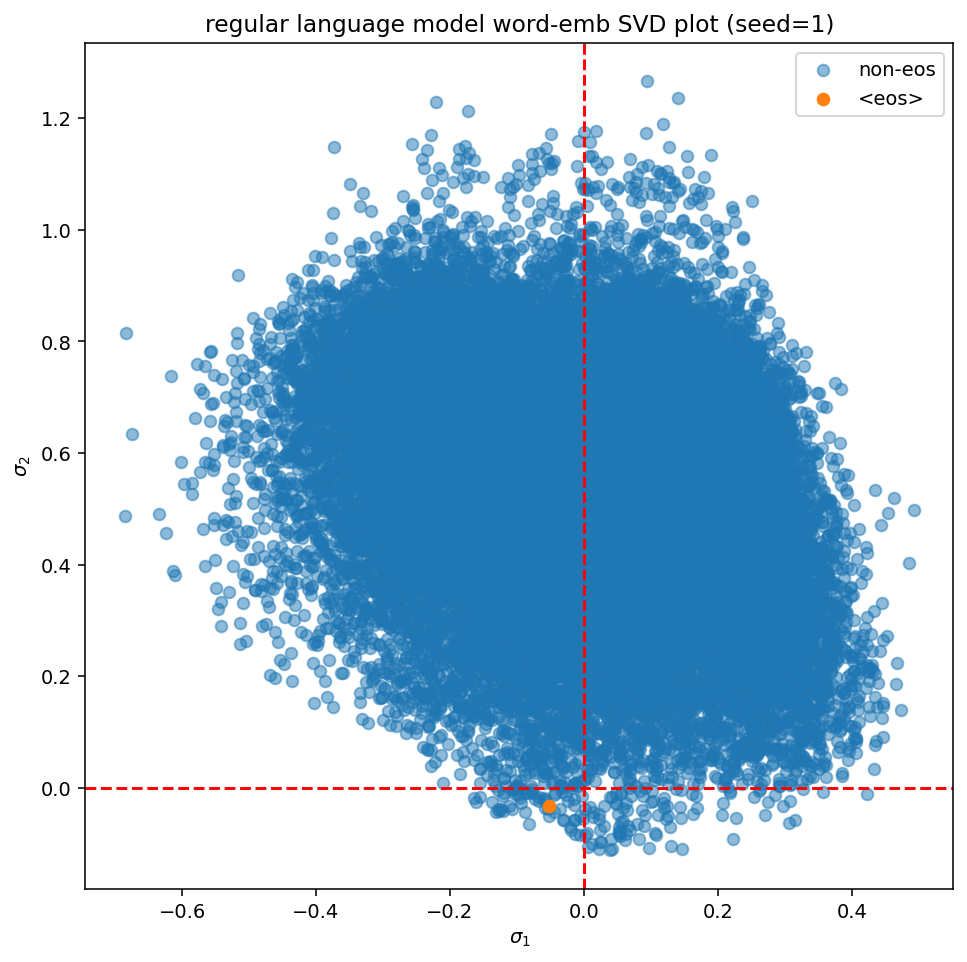

In [22]:
proj(lm1_svd,'regular language model word-emb SVD plot (seed=1)')

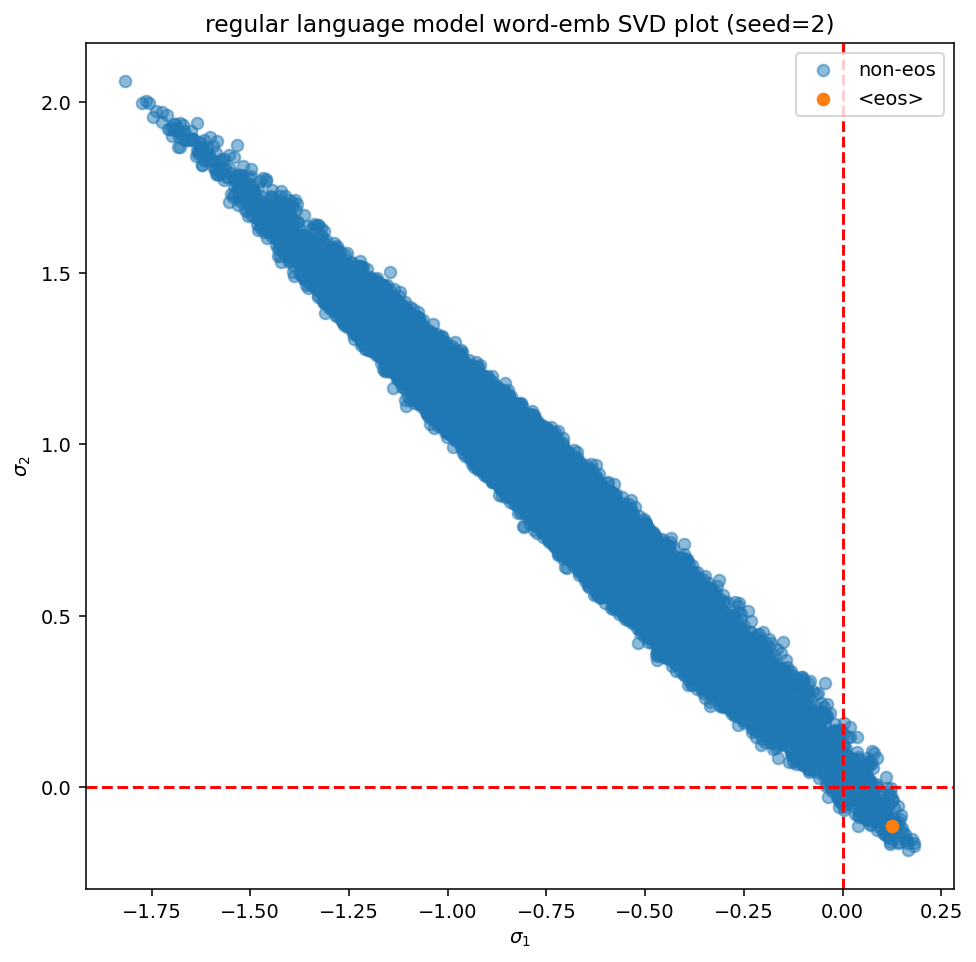

In [27]:
proj(lm2_svd,'regular language model word-emb SVD plot (seed=2)')

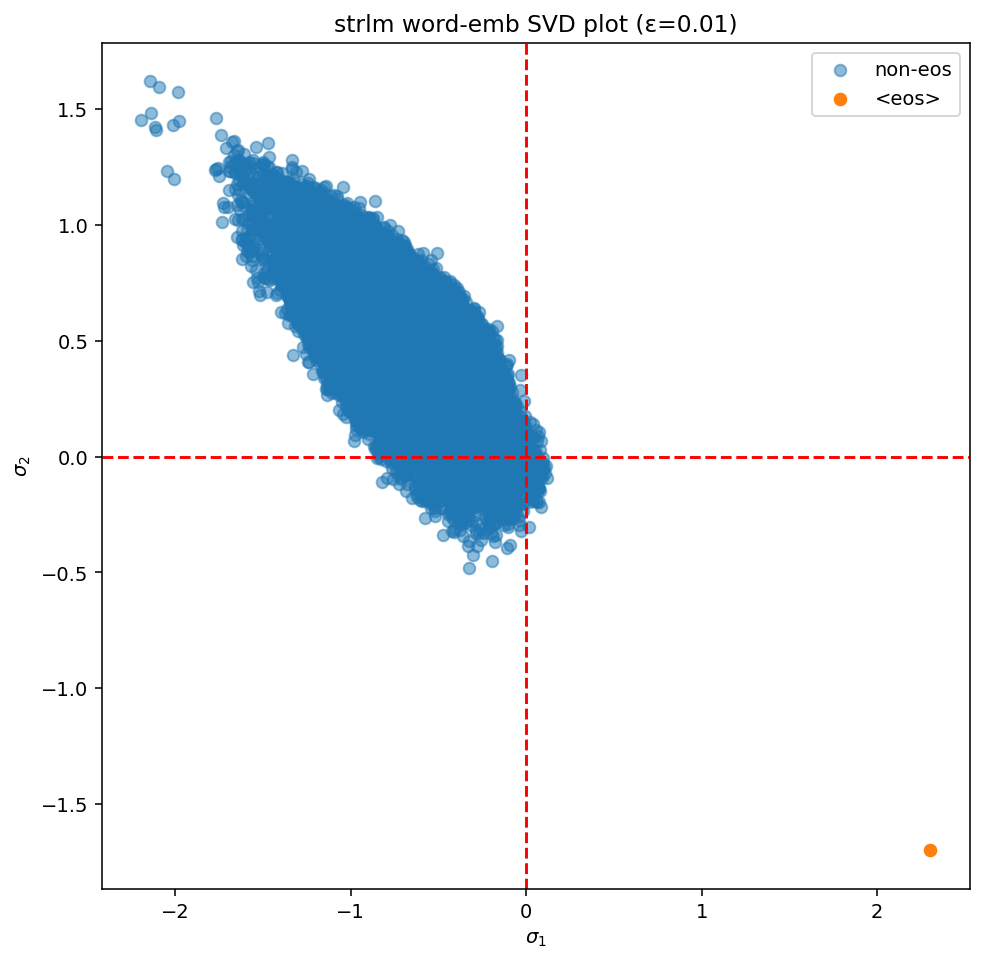

In [28]:
proj(strlm01_svd,'strlm word-emb SVD plot (ε=0.01)')

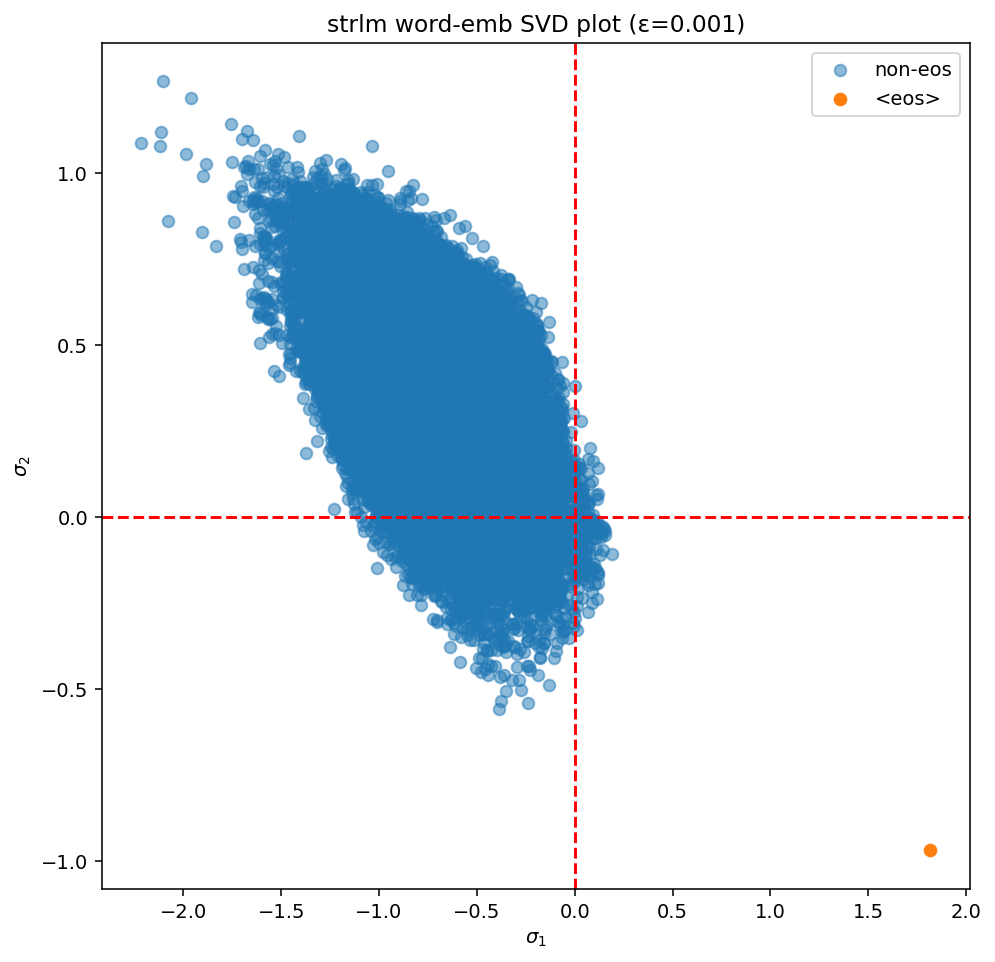

In [29]:
proj(strlm001_svd,'strlm word-emb SVD plot (ε=0.001)')

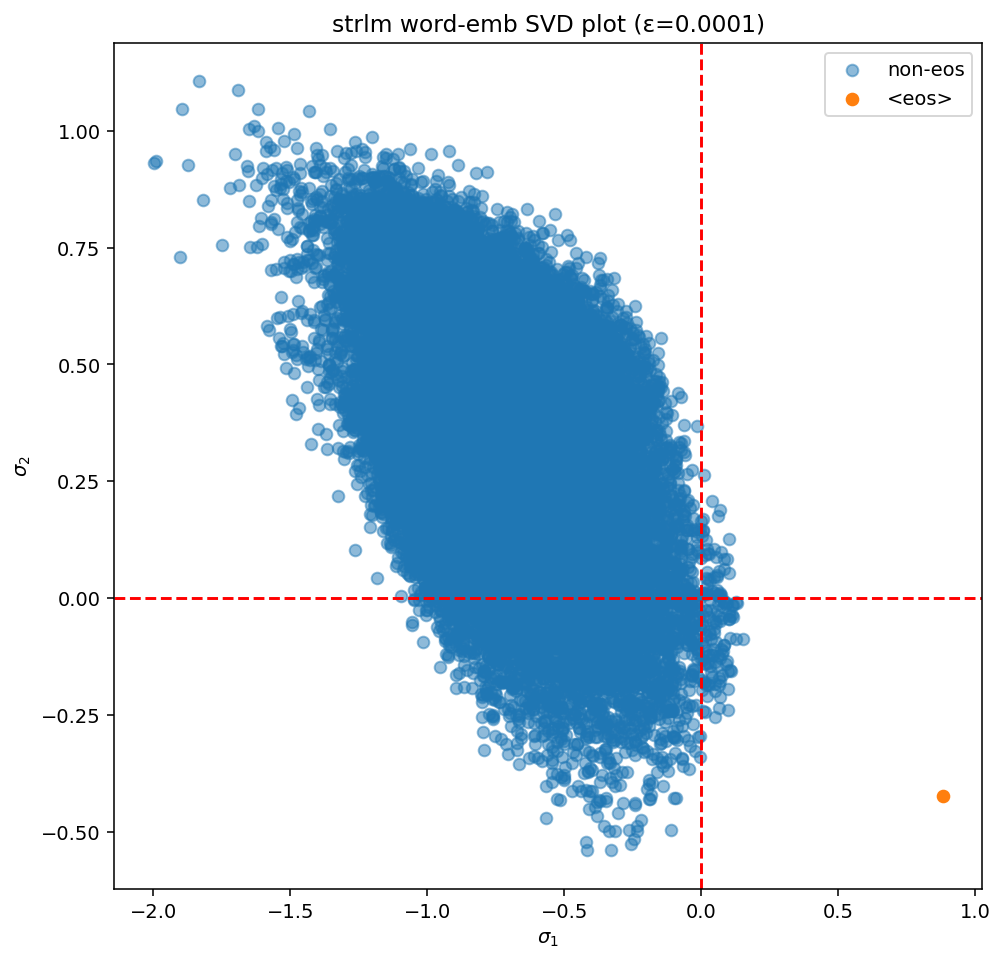

In [30]:
proj(strlm0001_svd,'strlm word-emb SVD plot (ε=0.0001)')